In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('Pokemon.csv', encoding='latin-1')
print("原始形状:", df.shape)
print("列名:", df.columns.tolist())
display(df.head())
display(df.tail(12))
display(df.info())

原始形状: (810, 13)
列名: ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
798,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,TRUE
799,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,TRUE
800,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,TRUE
801,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE
806,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
807,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           807 non-null    object
 1   Name        807 non-null    object
 2   Type 1      806 non-null    object
 3   Type 2      424 non-null    object
 4   Total       807 non-null    object
 5   HP          806 non-null    object
 6   Attack      807 non-null    object
 7   Defense     807 non-null    object
 8   Sp. Atk     807 non-null    object
 9   Sp. Def     807 non-null    object
 10  Speed       807 non-null    object
 11  Generation  807 non-null    object
 12  Legendary   807 non-null    object
dtypes: object(13)
memory usage: 82.4+ KB


None

In [4]:
# 去掉文件里可能重复出现的 header 行（例如 Name == 'Name' 或 # == '#'）
hdr_mask = (df['Name'].astype(str).str.strip().str.lower() == 'name') | (df['#'].astype(str).str.strip() == '#')
df = df[~hdr_mask].copy()

# 将 '#' 转为数值 pokedex，非数值的行先排除（认为是脏行或尾部说明）
df['pokedex_number'] = pd.to_numeric(df['#'], errors='coerce')
removed_bad_pokedex = df['pokedex_number'].isnull().sum()
df = df[df['pokedex_number'].notnull()].copy()
df['pokedex_number'] = df['pokedex_number'].astype(int)

print("移除无效 pokedex 行数:", removed_bad_pokedex)
print("当前形状:", df.shape)


移除无效 pokedex 行数: 5
当前形状: (805, 14)


In [12]:
allowed_types = {'normal','fire','water','grass','electric','ice','fighting','poison',
                 'ground','flying','psychic','bug','rock','ghost','dark','dragon','steel','fairy'}

def clean_type2(v):
    if pd.isna(v): return np.nan
    s = str(v).strip()
    if s == '' or s.lower() in ['undefined','none','nan']:
        return np.nan
    if s.lower() in allowed_types:
        return s.title()
    # 非类型（数字、乱写等）全部视为缺失
    return np.nan

df['Type 2'] = df['Type 2'].apply(clean_type2)

In [7]:
num_cols = ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']
for c in num_cols:
    df[c + '_num'] = pd.to_numeric(df[c], errors='coerce')

# 找到任何统计列有非数值的行
bad_stat_rows = df[df[[c+'_num' for c in num_cols]].isnull().any(axis=1)]
print("数值列存在非数值或缺失的行数:", bad_stat_rows.shape[0])
display(bad_stat_rows.head(20))

数值列存在非数值或缺失的行数: 5


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Legendary,pokedex_number,Total_num,HP_num,Attack_num,Defense_num,Sp. Atk_num,Sp. Def_num,Speed_num,Generation_num
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,...,1,9,530,79.0,83.0,100,85.0,105.0,78,NaN
17,13,Weedle,Bug,Poison,195,NaN,35,30,20,20,...,FALSE,13,195,NaN,35.0,30,20.0,20.0,50,1.0
32,25,Pikachu,Electric,NaN,320,35,55,40,50,50,...,0,25,320,35.0,55.0,40,50.0,50.0,90,NaN
39,32,Nidoranâ?Poison,NaN,NaN,46,57,40,40,40,50,...,NaN,32,46,57.0,40.0,40,40.0,50.0,1,NaN
771,695,Heliolisk,Electric,Normal,481,62,55,52,109,94,...,FALSE,695,481,62.0,55.0,52,109.0,94.0,109,NaN


In [8]:
df['Attack_num'] = pd.to_numeric(df['Attack'], errors='coerce')
attack_outliers = df[df['Attack_num'] > 500]
display(attack_outliers[['pokedex_number','Name','Attack','Total','Generation','Legendary']])

# 将 >500 的 Attack 设为 NaN 并用同 Generation 的中位数填补
df.loc[df['Attack_num'] > 500, 'Attack_num'] = np.nan
df['Attack_imputed'] = df.groupby('Generation')['Attack_num'].transform(lambda x: x.fillna(x.median()))

,pokedex_number,Name,Attack,Total,Generation,Legendary
9,7,Squirtle,840,314,1,FALSE
140,128,Tauros,1000,490,1,FALSE


In [9]:
# 判断 Legendary 是否像 type 或数字
leg_is_type = df['Legendary'].astype(str).str.strip().str.lower().isin(allowed_types)
leg_is_numeric = pd.to_numeric(df['Legendary'], errors='coerce').notnull()
gen_num = pd.to_numeric(df['Generation'], errors='coerce')

swap_mask = gen_num.isnull() & (leg_is_type | leg_is_numeric)
print("检测到可能被置换的行数:", swap_mask.sum())
display(df[swap_mask][['pokedex_number','Name','Generation','Legendary','Type 1','Type 2']].head(30))

# 执行置换
df.loc[swap_mask, ['Generation', 'Legendary']] = df.loc[swap_mask, ['Legendary', 'Generation']].values

# 再次规范化类型
df['Generation_num'] = pd.to_numeric(df['Generation'], errors='coerce')
def legendary_to_bool(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in ['true','1','t','yes']: return True
    if s in ['false','0','f','no']: return False
    return x
df['Legendary_clean'] = df['Legendary'].apply(legendary_to_bool)

检测到可能被置换的行数: 2


,pokedex_number,Name,Generation,Legendary,Type 1,Type 2
11,9,Blastoise,FALSE,1,Water,NaN
32,25,Pikachu,FALSE,0,Electric,NaN


In [10]:
before = df.shape[0]
df = df.drop_duplicates(subset=['pokedex_number','Name'], keep='first').copy()
duplicates_removed = before - df.shape[0]
print("去重移除行数:", duplicates_removed)

# 最终保存
df.to_csv('Pokemon_cleaned_by_me.csv', index=False, encoding='utf-8-sig')
print("保存为 Pokemon_cleaned_by_me.csv")

去重移除行数: 5
保存为 Pokemon_cleaned_by_me.csv


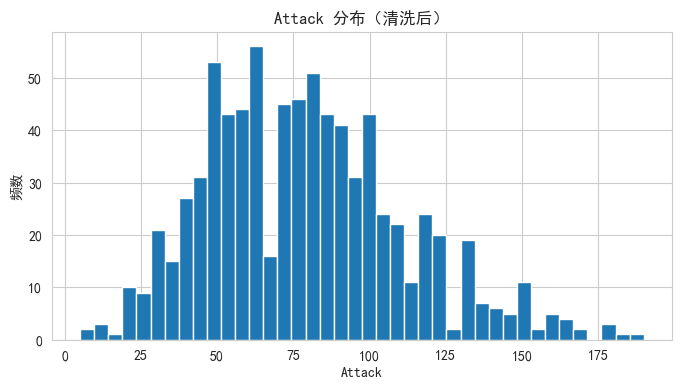

In [11]:
# 使用的是清洗并插补完成后的列
plt.figure(figsize=(8,4))
df['Attack_imputed'].dropna().hist(bins=40)
plt.title('Attack 分布（清洗后）')
plt.xlabel('Attack')
plt.ylabel('频数')
plt.show()
